In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset= pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset=dataset.drop(['CustomerID'], axis=1)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<Axes: xlabel='Gender', ylabel='count'>

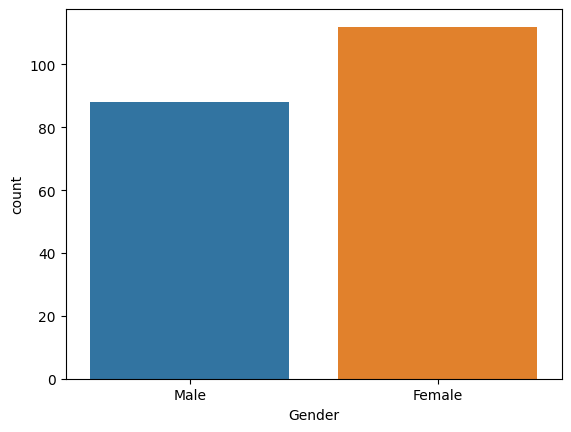

In [ ]:
sns.countplot(x='Gender',data=dataset)

In [ ]:
avg_gender_dataset = dataset.groupby(by=["Gender"]).mean()

avg_gender_dataset

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
avg_gender_dataset.reset_index(inplace=True)

fig = px.bar(avg_gender_dataset, x='Gender', y=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
             title='Averages separated by Gender', labels={'value': 'Average', 'variable': 'Attribute'},
             barmode='group', template='plotly_dark')

fig.show()


In [ ]:
la=LabelEncoder() #to convert object column to numerical
dataset['Gender']=la.fit_transform(dataset['Gender'])
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

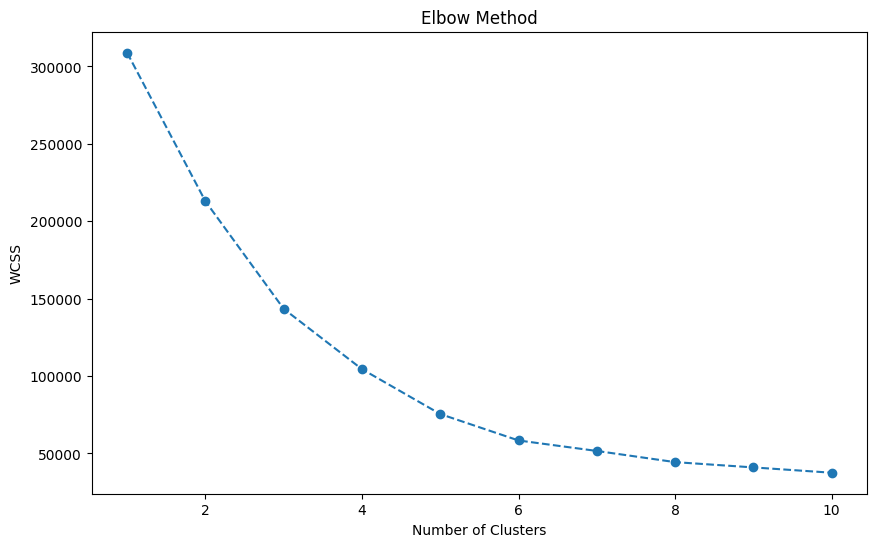

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(dataset)
dataset['Cluster'] = kmeans.labels_
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


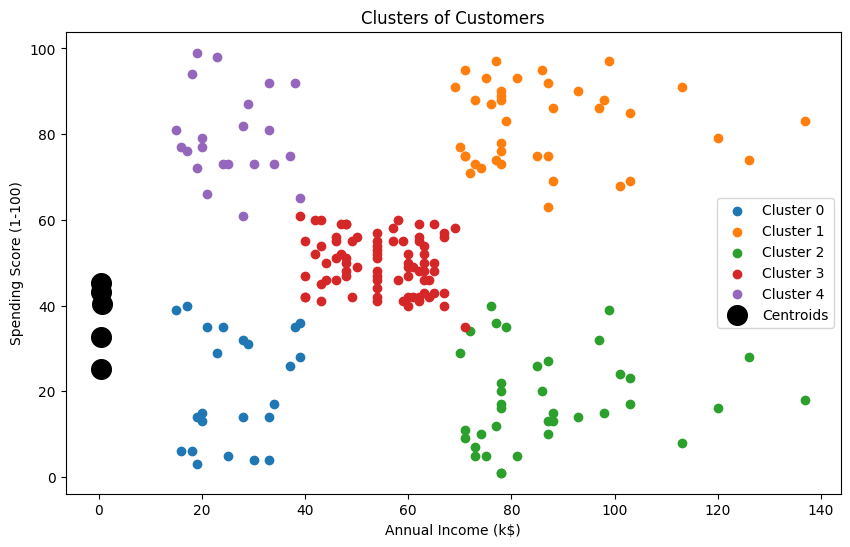

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_dataset = dataset[dataset['Cluster'] == cluster]
    plt.scatter(cluster_dataset['Annual Income (k$)'], cluster_dataset['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
dataset['Cluster'].value_counts().sort_values(ascending=True)

4    22
0    23
2    37
1    39
3    79
Name: Cluster, dtype: int64

In [ ]:
avg_by_cluster_dataset = dataset.groupby("Cluster").mean()

avg_by_cluster_dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.391304,45.217391,26.304348,20.913043
1,0.461538,32.692308,86.538462,82.128205
2,0.513514,40.324324,87.432432,18.189189
3,0.417722,43.126582,54.822785,49.835443
4,0.409091,25.272727,25.727273,79.363636


In [ ]:
avg_by_cluster_dataset.iplot(kind="bar",
                  sortbars=True,
                  yTitle="Totals", xTitle="By Cluster", title="Cluster Breakout",
                  theme="ggplot"
                  )

NameError: ignored